In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.svm import SVC,SVR
from sklearn.datasets import make_classification
import joblib
import os




In [239]:
base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'
Launch_Path= 'Models/'
os.makedirs(Launch_Path, exist_ok=True)


In [240]:
def eda(df, target, type='a'):  # Exploratory Data Analysis
    from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split

    # Display unique label count
    unique_count = df[target].nunique()
    print("Label Count =", unique_count)

    # Type 'a': Standard preprocessing
    if type == 'a':
        for col in df.select_dtypes(include=['object']).columns:
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
        # Handle missing values
        print(df.isnull().sum())
        df.fillna(df.mean(), inplace=True)  
        x = df.drop(columns=[target])
        y = df[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        # Apply StandardScaler and MinMaxScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        print(df.shape)
        return x_train, x_test, y_train, y_test

    # Type 'b': TF-IDF for text data
    if type == 'b':
        df.dropna(inplace=True)
        x = df[target].astype(str)  # Use only the text column for vectorization
        y = df[target]

        # Ensure labels are categorical
        if not y.dtype == 'object':
            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(y)

        x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        vectorizer = TfidfVectorizer()
        x_train = vectorizer.fit_transform(x_train_raw)
        x_test = vectorizer.transform(x_test_raw)

        return x_train, x_test, y_train, y_test


In [241]:
def SVC_Func(x_train, x_test, y_train, y_test,parameters,CV,Ver,name):
    classifier = SVC()
    grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV,verbose=Ver)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(x_test)
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    print(classification_report(y_test, y_pred))
    best_model = grid_search.best_estimator_
    joblib.dump(best_model, Launch_Path+name+'.pkl')
    print("Best model saved to 'best_model.pkl'")
   


In [242]:
def SVR_Func(x_train, x_test, y_train, y_test,parameters,CV,Ver,name):
    classifier = SVR()
    grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV,verbose=Ver)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    best_model = grid_search.best_estimator_
    joblib.dump(best_model, Launch_Path+name+'.pkl')
    print("Best model saved to 'best_model.pkl'")
   

In [243]:
df_iris = pd.read_csv(base_path+'/IRIS.csv')


In [244]:
x_train, x_test, y_train, y_test = eda(df_iris,'species')


Label Count = 3
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(150, 5)


In [245]:
parameters= [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}] #parameters for SVC


Fitting 6 folds for each of 5 candidates, totalling 30 fits
[CV 2/6] END ..............C=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/6] END ..............C=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/6] END ..............C=0.1, kernel=linear;, score=0.650 total time=   0.0s
[CV 4/6] END ..............C=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/6] END ..............C=0.1, kernel=linear;, score=0.700 total time=   0.0s
[CV 6/6] END ..............C=0.1, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/6] END ................C=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/6] END ................C=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/6] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/6] END ................C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/6] END ................C=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 6/6] END ................C=1, kernel=linear;,

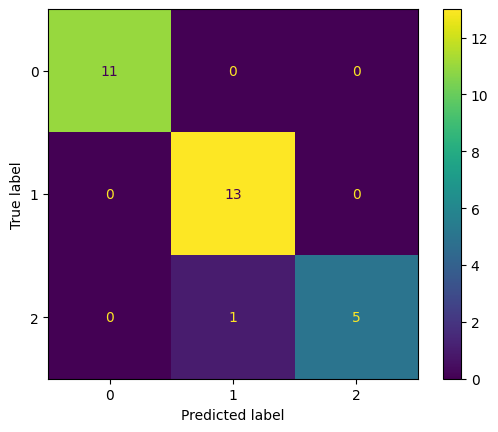

In [246]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'iris') #SVC Function


In [247]:
df_Cancer = pd.read_csv(base_path+'/Cancer.csv')


In [248]:
df_Cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [249]:

df_Cancer = df_Cancer.drop(columns=['id','Unnamed: 32'])


In [250]:
x_train, x_test, y_train, y_test = eda(df_Cancer,'diagnosis')


Label Count = 2
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 31)


In [251]:
parameters = [{'C': [0.1, 1, 10, 100, 1000,.0001], 'kernel': ['poly']}] #parameters for SVR


Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV 1/6] END ................C=0.1, kernel=poly;, score=0.961 total time=   0.0s
[CV 2/6] END ................C=0.1, kernel=poly;, score=0.974 total time=   0.0s
[CV 3/6] END ................C=0.1, kernel=poly;, score=0.961 total time=   0.0s
[CV 4/6] END ................C=0.1, kernel=poly;, score=0.974 total time=   0.0s
[CV 5/6] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 6/6] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/6] END ..................C=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 2/6] END ..................C=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 3/6] END ..................C=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 4/6] END ..................C=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 5/6] END ..................C=1, kernel=poly;, score=0.987 total time=   0.0s
[CV 6/6] END ..................C=1, kernel=poly;,

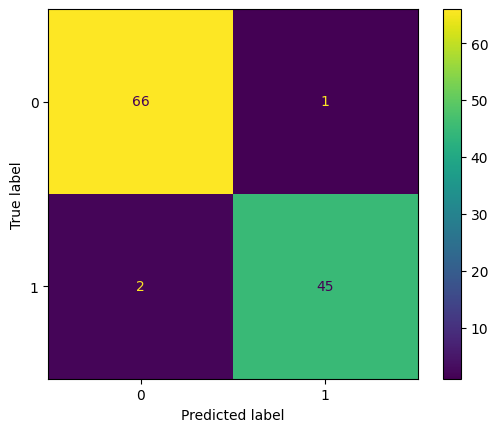

In [252]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,'Cancer') #SVR Function


In [253]:
df_Wine = pd.read_csv(base_path+'/Wine.csv')


In [254]:
df_Wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

In [255]:
x_train, x_test, y_train, y_test = eda(df_Wine,'class_name')


Label Count = 3
class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64
(178, 15)


In [256]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf','linear']}] #parameters for SVR


{'C': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Best model saved to 'best_model.pkl'


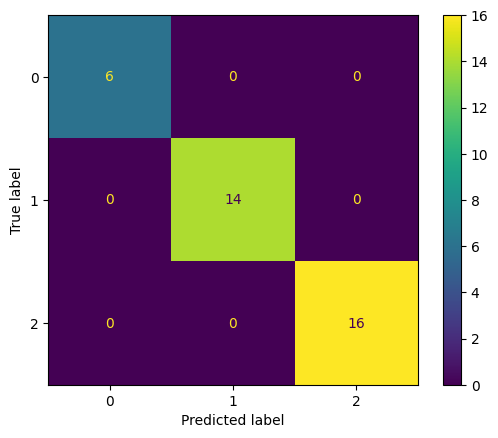

In [257]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'wine') #SVR Function


In [258]:
from sklearn.datasets import load_digits
df_digits = load_digits()   


In [259]:
df_digits = pd.DataFrame(data= np.c_[df_digits['data'], df_digits['target']])


In [260]:
df_digits.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [261]:
x_train, x_test, y_train, y_test = eda(df_digits,64)


Label Count = 10
0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64
(1797, 65)


{'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.97      1.00      0.99        35
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00        29
         4.0       1.00      1.00      1.00        30
         5.0       0.97      0.97      0.97        40
         6.0       1.00      1.00      1.00        44
         7.0       1.00      1.00      1.00        39
         8.0       1.00      0.97      0.99        39
         9.0       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Best model saved to 'best_model.pkl'


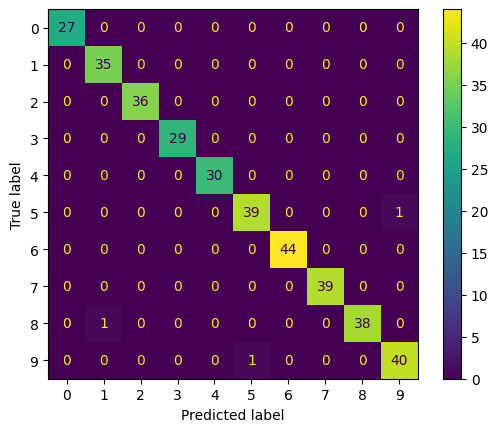

In [262]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'digits') #SVR Function


In [263]:
X, y = make_classification(
    n_samples=1000,    # Number of samples
    n_features=20,     # Number of features
    n_informative=15,  # Number of informative features
    n_redundant=5,     # Number of redundant features
    random_state=42
)


In [264]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [265]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf','linear']}] #parameters for SVR


In [ ]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,"Synthetic") #SVR Function


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV 4/6] END .................C=0.1, kernel=rbf;, score=0.865 total time=   0.0s
[CV 1/6] END ..............C=0.1, kernel=linear;, score=0.754 total time=   0.0s
[CV 6/6] END .................C=0.1, kernel=rbf;, score=0.902 total time=   0.0s
[CV 2/6] END .................C=0.1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 3/6] END .................C=0.1, kernel=rbf;, score=0.842 total time=   0.1s
[CV 5/6] END .................C=0.1, kernel=rbf;, score=0.872 total time=   0.1s
[CV 2/6] END ..............C=0.1, kernel=linear;, score=0.836 total time=   0.0s
[CV 1/6] END .................C=0.1, kernel=rbf;, score=0.836 total time=   0.1s
[CV 1/6] END ...................C=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/6] END ..............C=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 3/6] END ...................C=1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 4/6] END ...................C=1, kernel=rbf;

In [103]:
df_Titanic = pd.read_csv(base_path+'/Titanic.csv')


In [ ]:
df_Titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [105]:
df_Titanic.isnull().sum()
df_Titanic.drop(columns=['body'],inplace=True)


In [ ]:
x_train, x_test, y_train, y_test = eda(df_Titanic,'survived')


Label Count = 2
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin          0
embarked       0
boat           0
home.dest      0
dtype: int64
(1309, 13)


In [107]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


{'C': 0.1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Best model saved to 'best_model.pkl'


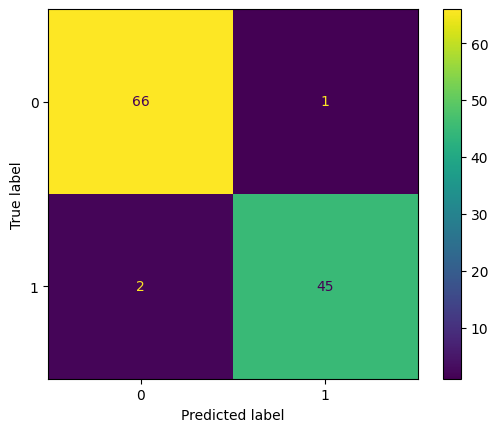

In [234]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'Titanic') #SVR Function


In [109]:
df_Text = pd.read_csv(base_path+'/BBC News Train.csv')


In [110]:
x_train, x_test, y_train, y_test = eda(df_Text,'Category','b')


Label Count = 5


In [111]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']}] #parameters for SVR


{'C': 0.1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Best model saved to 'best_model.pkl'


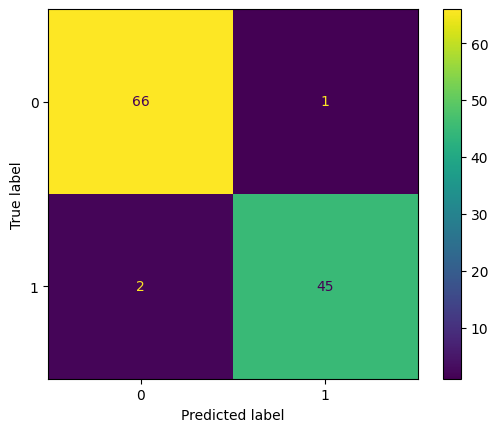

In [ ]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'Txt') #SVR Function


In [113]:
df_Credit = pd.read_csv(base_path+'/creditcard.csv')    


In [114]:
x_train, x_test, y_train, y_test = eda(df_Credit,'Class')


Label Count = 2
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
(284807, 31)


In [ ]:
parameters = [{'C': [0.1, 1, 10, 100, 1000] ,'kernel': ['rbf']}] #parameters for SVR


Fitting 6 folds for each of 6 candidates, totalling 36 fits
[CV 1/6] END ................C=0.1, kernel=poly;, score=0.961 total time=   0.0s
[CV 3/6] END ................C=0.1, kernel=poly;, score=0.961 total time=   0.0s
[CV 2/6] END ................C=0.1, kernel=poly;, score=0.974 total time=   0.0s
[CV 4/6] END ................C=0.1, kernel=poly;, score=0.974 total time=   0.0s
[CV 5/6] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 6/6] END ................C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/6] END ..................C=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 2/6] END ..................C=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 3/6] END ..................C=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 4/6] END ..................C=1, kernel=poly;, score=0.961 total time=   0.0s
[CV 6/6] END ..................C=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/6] END .................C=10, kernel=poly;,

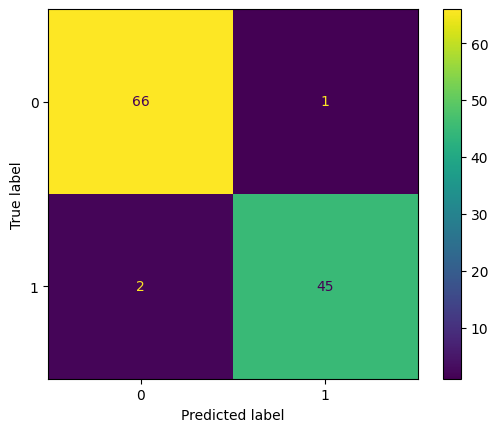

In [ ]:
SVC_Func(x_train, x_test, y_train, y_test,parameters,6,3,"CreditCard") #SVR Function


SVR 

In [ ]:
df_Housing = pd.read_csv(base_path+'/House Prices.csv')


In [118]:
df_Housing.head()


,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [119]:
x_train, x_test, y_train, y_test = eda(df_Housing,'Price')


Label Count = 3625
ID               0
Date             0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_living      0
Sqft_lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_above       0
Sqft_basement    0
Yr_built         0
Yr_renovated     0
zipcode          0
Lat              0
Long             0
Sqft_living15    0
Sqft_lot15       0
dtype: int64
(21613, 21)


In [121]:
parameters  = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}] #parameters for SVR


In [ ]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3,"Houses") #SVR Function


Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 2/2] END ................C=0.1, kernel=poly;, score=0.551 total time=   0.0s
[CV 1/2] END ................C=0.1, kernel=poly;, score=0.539 total time=   0.0s
[CV 1/2] END ..................C=1, kernel=poly;, score=0.398 total time=   0.1s
[CV 2/2] END .................C=1, kernel=poly;, score=-0.099 total time=   0.1s
[CV 1/2] END .............C=0.0001, kernel=poly;, score=0.378 total time=   0.0s
[CV 2/2] END .............C=0.0001, kernel=poly;, score=0.356 total time=   0.0s
[CV 2/2] END ................C=10, kernel=poly;, score=-2.309 total time=   0.2s
[CV 1/2] END ................C=10, kernel=poly;, score=-0.993 total time=   0.3s
[CV 1/2] END ..............C=1000, kernel=poly;, score=-3.316 total time=   0.3s
[CV 1/2] END ...............C=100, kernel=poly;, score=-3.316 total time=   0.4s
[CV 2/2] END .............C=1000, kernel=poly;, score=-10.405 total time=   0.6s
[CV 2/2] END ..............C=100, kernel=poly;, s

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
df_Auto = pd.read_csv(base_path+'/MPG.csv')


In [ ]:
df_Auto.head()


In [ ]:
x_train, x_test, y_train, y_test = eda(df_Auto,'mpg')


In [ ]:
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear','poly']}] #parameters for SVR


In [ ]:
SVR_Func(x_train, x_test, y_train, y_test,parameters,2,3) #SVR Function
